![A soccer pitch for an international match.](../../imgs/soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [1]:
# Incorrect and not giving a valid answer

import pandas as pd
import numpy as np
from scipy.stats import t

# Read in the spread-sheets
women_results = pd.read_csv("../../data/women_results.csv")
men_results = pd.read_csv("../../data/men_results.csv")

# Convert date to date type
women_results["date"] = pd.to_datetime(women_results["date"])
men_results["date"] = pd.to_datetime(men_results["date"])

# Extract the year from the date
women_results["year"] = women_results["date"].dt.year
men_results["year"] = men_results["date"].dt.year

# Calculate the total number of points scored
women_results["total_score"] = women_results["home_score"] + women_results["away_score"]
men_results["total_score"] = men_results["home_score"] + men_results["away_score"]

# Add a column so we can merge them together later
women_results["gender"] = "women"
men_results["gender"] = "men"

# Filter the list down to only games greater than 2002-01-01
filtered_women_results = women_results[(women_results["date"] >= "2002-01-01") & (women_results["tournament"].isin(["FIFA World Cup"]))]
filtered_men_results = men_results[(men_results["date"] >= "2002-01-01") & (men_results["tournament"].isin(["FIFA World Cup"]))]


# Calculate the t_value
xbar_women = filtered_women_results["total_score"].mean()
xbar_men = filtered_men_results["total_score"].mean()

s_women = filtered_women_results["total_score"].std()
s_men = filtered_men_results["total_score"].std()

n_women = filtered_women_results["total_score"].count()
n_men = filtered_men_results["total_score"].count()


# Calculate the numerator of the test statistic
numerator = xbar_women - xbar_men
# Calculate the denominator of the test statistic
denominator = np.sqrt(s_women**2/n_women + s_men**2/n_men)
# Calculate the test statistic
t_stat = numerator / denominator


# Calculate the degrees of freedom (based upon women, since it's smaller)
degrees_of_freedom = n_women - 1



# Calculate the p-value from the test stat
p_val = t.cdf(t_stat, df=degrees_of_freedom)


result = "fail to reject"
result_dict = {"p_val": p_val, "result": result}

print(result_dict)
filtered_men_results.head(20)

{'p_val': 0.9972984566460807, 'result': 'fail to reject'}


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,year,total_score,gender
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,2002,1,men
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,2002,8,men
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2002,2,men
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,2002,3,men
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,2002,1,men
25169,25169,2002-06-02,England,Sweden,1,1,FIFA World Cup,2002,2,men
25170,25170,2002-06-02,Paraguay,South Africa,2,2,FIFA World Cup,2002,4,men
25171,25171,2002-06-02,Spain,Slovenia,3,1,FIFA World Cup,2002,4,men
25172,25172,2002-06-03,Brazil,Turkey,2,1,FIFA World Cup,2002,3,men
25173,25173,2002-06-03,Croatia,Mexico,0,1,FIFA World Cup,2002,1,men


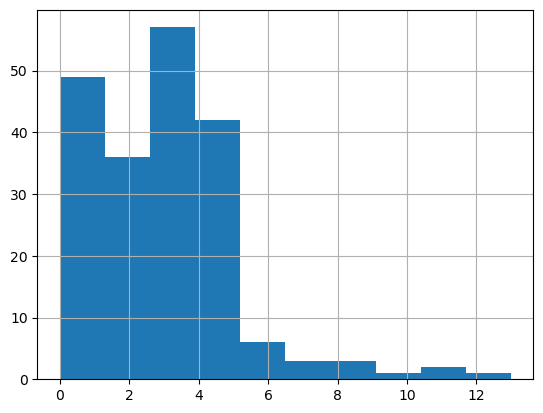

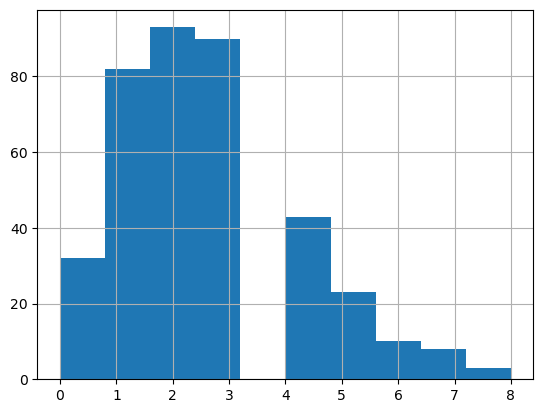

<Figure size 640x480 with 0 Axes>

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import mannwhitneyu


# Read in the spread-sheets
women_results = pd.read_csv("women_results.csv")
men_results = pd.read_csv("men_results.csv")

# Convert date to date type
women_results["date"] = pd.to_datetime(women_results["date"])
men_results["date"] = pd.to_datetime(men_results["date"])

# Extract the year from the date
women_results["year"] = women_results["date"].dt.year
men_results["year"] = men_results["date"].dt.year

# Calculate the total number of points scored
women_results["total_score"] = women_results["home_score"] + women_results["away_score"]
men_results["total_score"] = men_results["home_score"] + men_results["away_score"]

# Add a column so we can merge them together later
women_results["gender"] = "women"
men_results["gender"] = "men"

# Filter the list down to only games greater than 2002-01-01
filtered_women_results = women_results[(women_results["date"] >= "2002-01-01") & (women_results["tournament"].isin(["FIFA World Cup"]))]
filtered_men_results = men_results[(men_results["date"] >= "2002-01-01") & (men_results["tournament"].isin(["FIFA World Cup"]))]


# Determine normality using histograms
filtered_women_results["total_score"].hist()
plt.show()
plt.clf()

# Goals scored is not normally distributed, so use Wilcoxon-Mann-Whitney test of two groups
filtered_men_results["total_score"].hist()
plt.show()
plt.clf()


# Combine women's and men's data and calculate goals scored in each match
both = pd.concat([filtered_women_results, filtered_men_results], axis=0, ignore_index=True)

# Transform the data for the pingouin Mann-Whitney U t-test/Wilcoxon-Mann-Whitney test
both_subset = both[["total_score", "gender"]]
both_subset_wide = both_subset.pivot(columns="gender", values="total_score")

# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_pg = pingouin.mwu(x=both_subset_wide["women"],
                          y=both_subset_wide["men"],
                          alternative="greater")

# Alternative SciPy solution: Perform right-tailed Wilcoxon-Mann-Whitney test with scipy
results_scipy = mannwhitneyu(x=filtered_women_results["total_score"],
                             y=filtered_men_results["total_score"],
                             alternative="greater")

# Extract p-value as a float
p_val = results_pg["p-val"].values[0]

# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}

/tmp/ipykernel_879774/2051966428.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_subset["group"] = "men"
/tmp/ipykernel_879774/2051966428.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_subset["group"] = "women"
/tmp/ipykernel_879774/2051966428.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

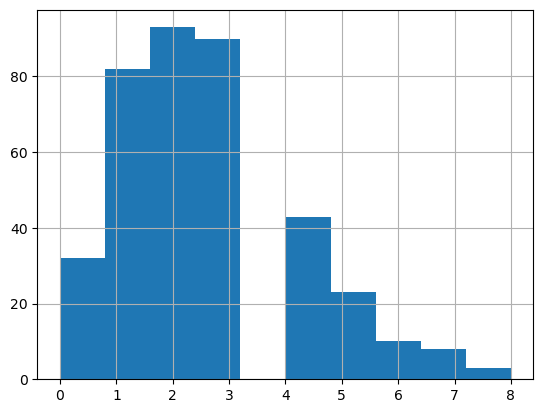

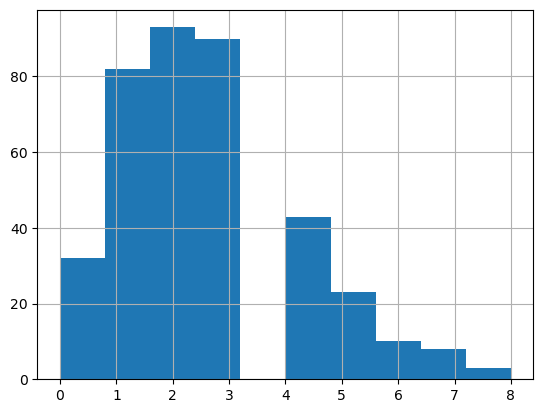

<Figure size 640x480 with 0 Axes>

In [5]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import mannwhitneyu

# Load men's and women's datasets
men = pd.read_csv("../../data/men_results.csv")
women = pd.read_csv("../../data/women_results.csv")

# Filter the data for the time range and tournament
men["date"] = pd.to_datetime(men["date"])
men_subset = men[(men["date"] > "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"]))]
women["date"] = pd.to_datetime(women["date"])
women_subset = women[(women["date"] > "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))]

# Create group and goals_scored columns
men_subset["group"] = "men"
women_subset["group"] = "women"
men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

# Determine normality using histograms
men_subset["goals_scored"].hist()
plt.show()
plt.clf()

# Goals scored is not normally distributed, so use Wilcoxon-Mann-Whitney test of two groups
men_subset["goals_scored"].hist()
plt.show()
plt.clf()

# Combine women's and men's data and calculate goals scored in each match
both = pd.concat([women_subset, men_subset], axis=0, ignore_index=True)

# Transform the data for the pingouin Mann-Whitney U t-test/Wilcoxon-Mann-Whitney test
both_subset = both[["goals_scored", "group"]]
both_subset_wide = both_subset.pivot(columns="group", values="goals_scored")

# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_pg = pingouin.mwu(x=both_subset_wide["women"],
                          y=both_subset_wide["men"],
                          alternative="greater")

# Alternative SciPy solution: Perform right-tailed Wilcoxon-Mann-Whitney test with scipy
results_scipy = mannwhitneyu(x=women_subset["goals_scored"],
                             y=men_subset["goals_scored"],
                             alternative="greater")

# Extract p-value as a float
p_val = results_pg["p-val"].values[0]

# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}